# Feature Engineering

In [9]:
from pathlib import Path
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

DATASET = Path("datasets/lotto/data_processed.csv")

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [10]:
# Read into data frame
dataset = pd.read_csv(DATASET, header=0, sep=',', quotechar='"', parse_dates=['DrawDate'], dtype={'PrizeType': str})

In [11]:
dataset.describe()

,DrawNo,LuckyNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,1st_digit,2nd_digit,3rd_digit,4th_digit,...,pos_4_0_freq,pos_4_1_freq,pos_4_2_freq,pos_4_3_freq,pos_4_4_freq,pos_4_5_freq,pos_4_6_freq,pos_4_7_freq,pos_4_8_freq,pos_4_9_freq
count,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,...,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000
mean,268299.492419,4974.001777,764.409447,764.409447,66.179053,66.179053,4.475471,4.490986,4.495935,4.472577,...,5213.931883,5388.845309,5205.592837,5331.664250,5285.252472,5136.015381,5226.336629,5188.187871,5243.072951,5152.100417
std,131388.886981,2885.324727,832.538166,832.538166,93.325465,93.325465,2.871106,2.875512,2.876148,2.872390,...,3041.457136,3081.198613,3038.744415,3037.858059,3019.637449,2968.146196,3035.126119,3003.764232,3030.221748,2961.420330
min,40792.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,8.000000,2.000000,2.000000,5.000000,5.000000,5.000000,6.000000,2.000000,6.000000
25%,154499.000000,2463.000000,157.000000,157.000000,15.000000,15.000000,2.000000,2.000000,2.000000,2.000000,...,2577.000000,2706.000000,2579.000000,2694.000000,2675.000000,2557.000000,2602.000000,2598.000000,2593.000000,2613.000000
50%,268306.000000,4952.000000,504.000000,504.000000,39.000000,39.000000,4.000000,4.000000,4.000000,4.000000,...,5237.000000,5401.000000,5175.000000,5364.000000,5300.000000,5147.000000,5199.000000,5154.000000,5223.000000,5168.000000
75%,382113.000000,7463.000000,1095.000000,1095.000000,83.000000,83.000000,7.000000,7.000000,7.000000,7.000000,...,7837.000000,8057.000000,7862.000000,7964.000000,7863.000000,7738.000000,7860.000000,7789.000000,7883.000000,7692.000000
max,495819.000000,9999.000000,8087.000000,8087.000000,4113.000000,4113.000000,9.000000,9.000000,9.000000,9.000000,...,10498.000000,10740.000000,10493.000000,10575.000000,10505.000000,10282.000000,10524.000000,10374.000000,10432.000000,10276.000000


In [12]:
df = dataset.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104673 entries, 0 to 104672
Columns: 115 entries, DrawNo to pos_4_9_freq
dtypes: datetime64[ns](1), float64(2), int64(111), object(1)
memory usage: 91.8+ MB


In [14]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
DrawNo,40792,40792,40792,40792,40792,40792,40792,40792,40792,40792,...,41092,41092,41192,41192,41192,41192,41192,41192,41192,41192
DrawDate,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,...,1992-05-13 00:00:00,1992-05-13 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00,1992-05-14 00:00:00
PrizeType,1stPrizeNo,2ndPrizeNo,3rdPrizeNo,ConsolationNo1,ConsolationNo10,ConsolationNo2,ConsolationNo3,ConsolationNo4,ConsolationNo5,ConsolationNo6,...,SpecialNo8,SpecialNo9,1stPrizeNo,2ndPrizeNo,3rdPrizeNo,ConsolationNo1,ConsolationNo10,ConsolationNo2,ConsolationNo3,ConsolationNo4
LuckyNo,19,1124,592,5311,407,1949,1606,3775,6226,1271,...,6235,6947,5371,5472,3489,1683,7760,6817,4710,6375
DaysSinceLastExactMatch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DaysUntilNextExactMatch,28,2436,25,515,2114,95,351,494,494,410,...,2818,225,70,14,62,1437,1249,783,119,1021
DaysSinceLastAnyMatch,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
DaysUntilNextAnyMatch,28,162,11,204,22,95,35,126,232,119,...,218,1,42,14,59,63,174,3,7,34
1st_digit,0,1,0,5,0,1,1,3,6,1,...,6,6,5,5,3,1,7,6,4,6
2nd_digit,0,1,5,3,4,9,6,7,2,2,...,2,9,3,4,4,6,7,8,7,3


In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [16]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [17]:
# pytorch
import torch
from torchvision import transforms

In [18]:
# fastai
from fastai import *
from fastai.vision import *

In [19]:
np.c_?

Type:        CClass
String form: <numpy.lib.index_tricks.CClass object at 0x110f7a358>
Length:      0
File:        ~/anaconda3/lib/python3.7/site-packages/numpy/lib/index_tricks.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, 0, 0, 4, 5, 6]])


In [20]:
for ind, column in enumerate(df.columns):
    print("[{}]".format(column), end=' ')
    if ind % 8 == 0:
        print()

[DrawNo] 
[DrawDate] [PrizeType] [LuckyNo] [DaysSinceLastExactMatch] [DaysUntilNextExactMatch] [DaysSinceLastAnyMatch] [DaysUntilNextAnyMatch] [1st_digit] 
[2nd_digit] [3rd_digit] [4th_digit] [DrawYear] [DrawMonth] [DrawWeek] [DrawDay] [DrawDayofweek] 
[DrawDayofyear] [CumProbaExactMatch] [CumProbaAnyMatch] [0_1] [0_2] [0_3] [0_4] [0_5] 
[0_6] [0_7] [0_8] [0_9] [1_2] [1_3] [1_4] [1_5] 
[1_6] [1_7] [1_8] [1_9] [2_3] [2_4] [2_5] [2_6] 
[2_7] [2_8] [2_9] [3_4] [3_5] [3_6] [3_7] [3_8] 
[3_9] [4_5] [4_6] [4_7] [4_8] [4_9] [5_6] [5_7] 
[5_8] [5_9] [6_7] [6_8] [6_9] [7_8] [7_9] [8_9] 
[0_0] [1_1] [2_2] [3_3] [4_4] [5_5] [6_6] [7_7] 
[8_8] [9_9] [pos_1_0_freq] [pos_1_1_freq] [pos_1_2_freq] [pos_1_3_freq] [pos_1_4_freq] [pos_1_5_freq] 
[pos_1_6_freq] [pos_1_7_freq] [pos_1_8_freq] [pos_1_9_freq] [pos_2_0_freq] [pos_2_1_freq] [pos_2_2_freq] [pos_2_3_freq] 
[pos_2_4_freq] [pos_2_5_freq] [pos_2_6_freq] [pos_2_7_freq] [pos_2_8_freq] [pos_2_9_freq] [pos_3_0_freq] [pos_3_1_freq] 
[pos_3_2_freq] [pos_3

In [21]:
df = dataset.copy()
numeric_features = ["DrawNo",
                    "DaysSinceLastExactMatch", "DaysUntilNextExactMatch", 
                    "DaysSinceLastAnyMatch", "DaysUntilNextAnyMatch",
                    "DrawYear", "DrawMonth", "DrawWeek", "DrawDay", "DrawDayofweek", "DrawDayofyear",
                    "CumProbaExactMatch", "CumProbaAnyMatch",
                    
                   ]
categorical_features = ["PrizeType"]
datetime_features = ["DrawDate"]
target_feature = ["LuckyNo"]

In [22]:
df = df[target_feature + datetime_features + categorical_features + numeric_features]

In [23]:
df.head(10)

,LuckyNo,DrawDate,PrizeType,DrawNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch
0,19,1992-05-06,1stPrizeNo,40792,0,28,0,28,1992,5,19,6,2,127,0.01,0.01
1,1124,1992-05-06,2ndPrizeNo,40792,0,2436,0,162,1992,5,19,6,2,127,0.01,0.01
2,592,1992-05-06,3rdPrizeNo,40792,0,25,0,11,1992,5,19,6,2,127,0.01,0.01
3,5311,1992-05-06,ConsolationNo1,40792,0,515,0,204,1992,5,19,6,2,127,0.01,0.01
4,407,1992-05-06,ConsolationNo10,40792,0,2114,0,22,1992,5,19,6,2,127,0.01,0.01
5,1949,1992-05-06,ConsolationNo2,40792,0,95,0,95,1992,5,19,6,2,127,0.01,0.01
6,1606,1992-05-06,ConsolationNo3,40792,0,351,0,35,1992,5,19,6,2,127,0.01,0.01
7,3775,1992-05-06,ConsolationNo4,40792,0,494,0,126,1992,5,19,6,2,127,0.01,0.01
8,6226,1992-05-06,ConsolationNo5,40792,0,494,0,232,1992,5,19,6,2,127,0.01,0.01
9,1271,1992-05-06,ConsolationNo6,40792,0,410,0,119,1992,5,19,6,2,127,0.01,0.01


In [24]:
df.describe()

,LuckyNo,DrawNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch
count,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000,104673.000000
mean,4974.001777,268299.492419,764.409447,764.409447,66.179053,66.179053,2005.754779,6.501648,26.452428,15.628214,4.054054,182.380356,0.062382,0.930387
std,2885.324727,131388.886981,832.538166,832.538166,93.325465,93.325465,7.809743,3.462904,15.123744,8.942459,1.843042,105.868193,0.038001,0.675621
min,0.000000,40792.000000,0.000000,0.000000,0.000000,0.000000,1992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.010000
25%,2463.000000,154499.000000,157.000000,157.000000,15.000000,15.000000,1999.000000,3.000000,13.000000,8.000000,2.000000,90.000000,0.030000,0.380000
50%,4952.000000,268306.000000,504.000000,504.000000,39.000000,39.000000,2006.000000,7.000000,26.000000,16.000000,5.000000,182.000000,0.060000,0.800000
75%,7463.000000,382113.000000,1095.000000,1095.000000,83.000000,83.000000,2013.000000,10.000000,40.000000,24.000000,6.000000,274.000000,0.090000,1.310000
max,9999.000000,495819.000000,8087.000000,8087.000000,4113.000000,4113.000000,2019.000000,12.000000,53.000000,31.000000,6.000000,366.000000,0.270000,2.930000


## Visualization

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [27]:
# pd.cut?
# np.inf
# pd.Categorical??

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1205e4a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128882b00>]], dtype=object)

<Figure size 432x288 with 0 Axes>

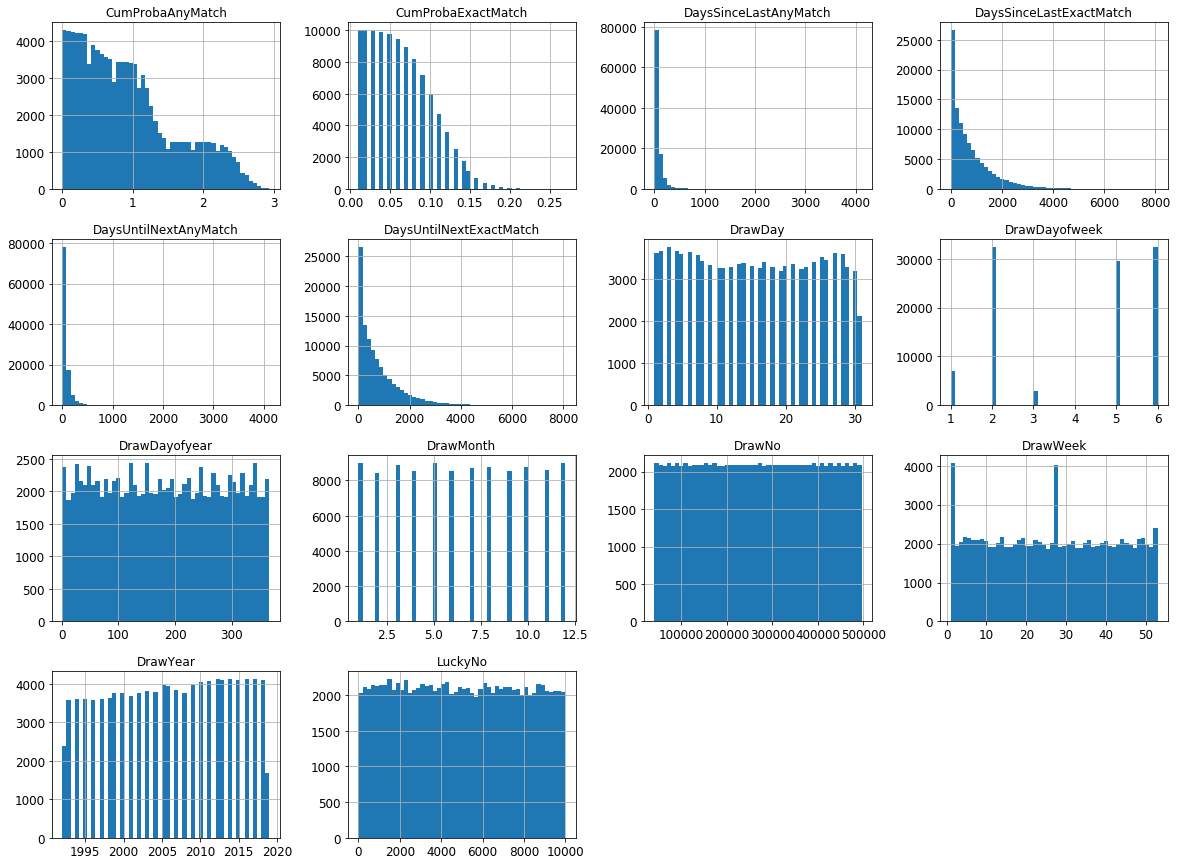

In [28]:
plt.tight_layout()
df.hist(bins=50, figsize=(20,15))

# df.hist??

In [29]:
corr_matrix = df.corr()
corr_matrix['LuckyNo'].sort_values(ascending=False)

LuckyNo                    1.000000
DaysUntilNextExactMatch    0.005985
DaysSinceLastExactMatch    0.005985
DrawDayofweek              0.004380
DaysUntilNextAnyMatch      0.003307
DaysSinceLastAnyMatch      0.002328
DrawDay                    0.000759
DrawWeek                  -0.002762
DrawDayofyear             -0.002896
DrawMonth                 -0.002985
DrawYear                  -0.003071
DrawNo                    -0.003218
CumProbaAnyMatch          -0.003994
CumProbaExactMatch        -0.009410
Name: LuckyNo, dtype: float64

## Numeric

```
1. Numeric feature preprocessing is different for tree and
non-tree models:
    a. Tree-based models doesn’t depend on scaling
    b. Non-tree-based models hugely depend on scaling


2. Most often used preprocessings are:
    a. MinMaxScaler - to [0,1]
    b. StandardScaler - to mean==0, std==1
    c. Rank - sets spaces between sorted values to be equal
    d. np.log(1+x) and np.sqrt(1+x)


3. Scaling and Rank for numeric features:
    a. Tree-based models doesn't depend on them
    b. Non-tree-based models hugely depend on them

4. Most often used preprocessings are:
    a. MinMaxScaler - to [0,1]
    b. StandardScaler - to mean==0, std==1
    c. Rank - sets spaces between sorted values to be equal
    d. np.log(1+x) and np.sqrt(1+x)

5. Feature generation is powered by:
    a. Prior knowledge
    b. Exploratory data analysis
    
To [0,1]
sklearn.preprocessing.MinMaxScaler
X = (X  X.min())/(X.max()  X.min())

To mean=0, std=1
sklearn.preprocessing.StandardScaler
X = (X  X.mean())/X.std()    

UPPERBOUND, LOWERBOUND = np.percentile(x, [1,99])
y = np.clip(x, UPPERBOUBD, LOWERBOUND)
pd.Series(y).hist(bins=30)

```


In [30]:
numeric_features

['DrawNo',
 'DaysSinceLastExactMatch',
 'DaysUntilNextExactMatch',
 'DaysSinceLastAnyMatch',
 'DaysUntilNextAnyMatch',
 'DrawYear',
 'DrawMonth',
 'DrawWeek',
 'DrawDay',
 'DrawDayofweek',
 'DrawDayofyear',
 'CumProbaExactMatch',
 'CumProbaAnyMatch']

## Categorical

```
- Label encoding
- One hot encoding
- Freq endoding
- Mean encoding

1. Values in ordinal features are sorted in some meaningful
order
2. Label encoding maps categories to numbers
3. Frequency encoding maps categories to their frequencies
4. Label and Frequency encodings are often used for treebased models
5. One-hot encoding is often used for non-tree-based models
6. Interactions of categorical features can help linear models
and KNN
```

In [31]:
# pd.factorize?
# pd.get_dummies? # sklearn.preprocessing.OneHotEncoder

## DateTime

## Timeseries

## Coordinate